# NBaIoT SOMKNN CLASSIFY

## Device 9

- Training on device 9 (using both Mirai and Gafgyt).
- Testing on device 9 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 9

In [8]:
train_index

9

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((19528, 115), (19528,)),
 ((316438, 115), (316438,)),
 ((514860, 115), (514860,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((13669, 115), (5859, 115), (13669,), (5859,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221506, 115), (94932, 115), (221506,), (94932,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((360402, 115), (154458, 115), (360402,), (154458,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

13669


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(13669, 115) (13669,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(27338, 115) (27338,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(13669, 115) (13669,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(27338, 115) (27338,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(100791, 115) (100791,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((5859, 115), (94932, 115), (5859,), (94932,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(160317, 115) (160317,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(112221, 115) (112221,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='rand')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 3.32869865e-03  7.79381460e-02  4.54488186e-08 ...  1.41522176e-18
   1.36728386e-34  2.63126798e-17]
 [ 3.32869866e-03  7.79381461e-02  4.57449383e-08 ...  3.60958584e-18
  -3.45930289e-34 -2.72313269e-17]
 [ 6.65707238e-03  4.28659691e-01  1.56212870e-16 ...  1.28096278e-16
  -2.66732426e-33  0.00000000e+00]
 ...
 [ 3.32869851e-03  7.79381306e-02  1.10840735e-08 ...  4.00575989e-18
  -1.30751189e-34  0.00000000e+00]
 [ 3.32869846e-03  4.28659691e-01  0.00000000e+00 ...  1.01244481e-16
   2.68973875e-34  9.38332470e-19]
 [ 3.32869846e-03  7.79381256e-02  9.72585611e-18 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


0.5
Total train time: 173.1384174823761


### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.997     0.981      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.983     0.998     0.990    100791
weighted avg      0.998     0.998     0.998    100791



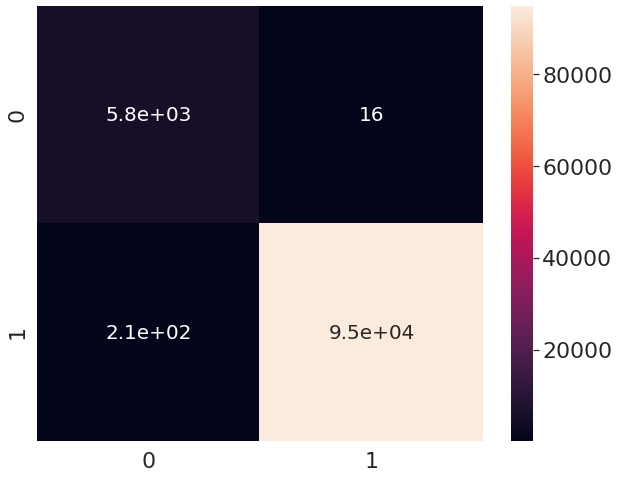

AUC score:  0.9975390582752321


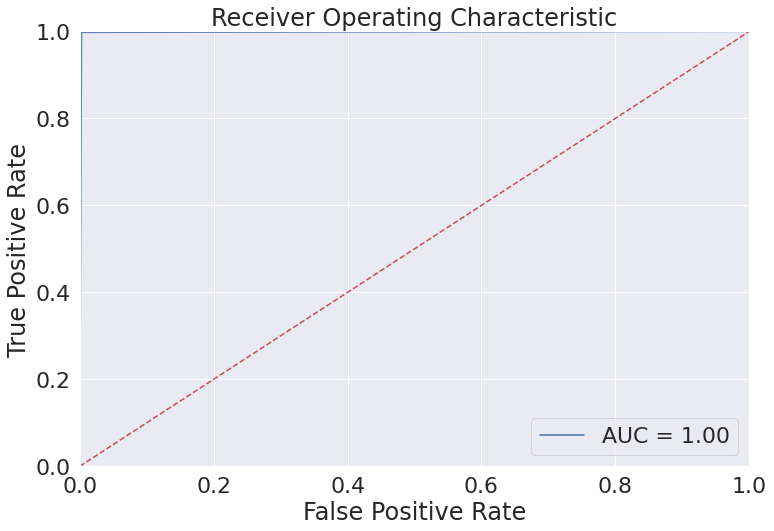

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [31]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.997     0.984      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.985     0.998     0.991    100791
weighted avg      0.998     0.998     0.998    100791



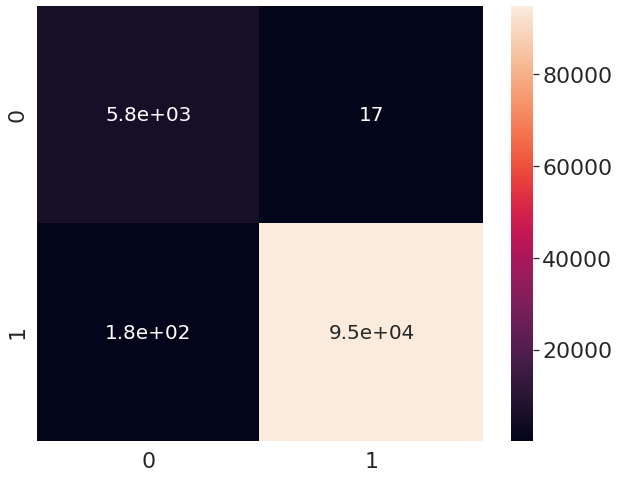

AUC score:  0.9976117273174048


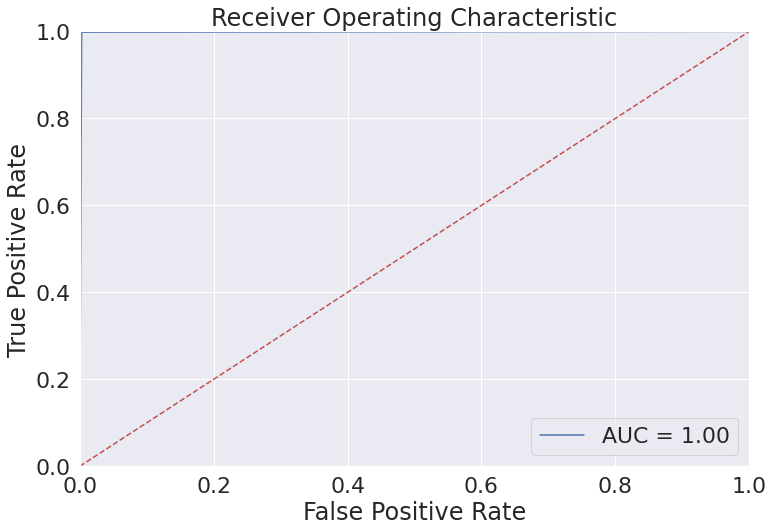

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.053     0.998     0.100      4100
           2      1.000     0.322     0.487    108121

    accuracy                          0.346    112221
   macro avg      0.526     0.660     0.293    112221
weighted avg      0.965     0.346     0.473    112221



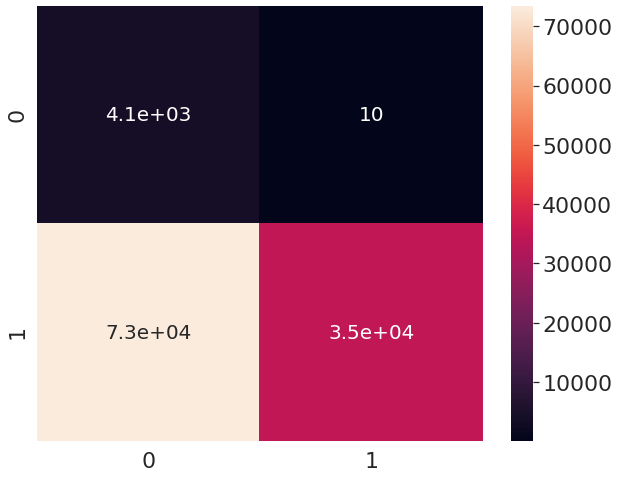

AUC score:  0.6595771877984038


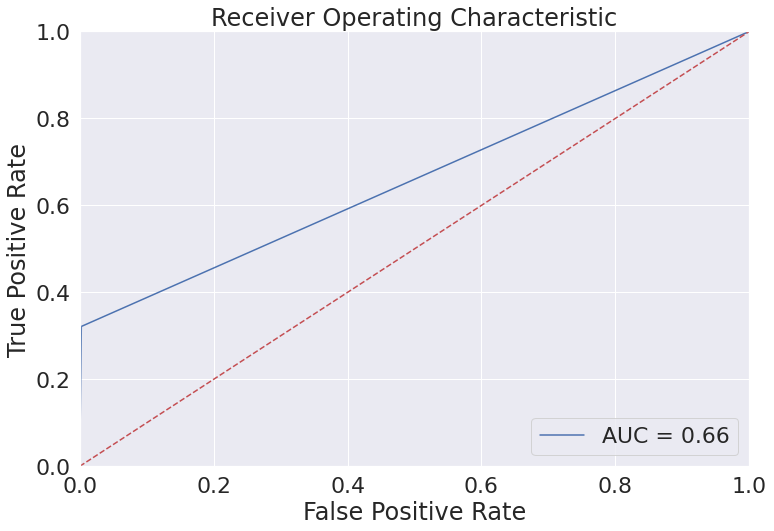

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [33]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.053     0.997     0.100      4100
           2      1.000     0.322     0.487    108121

    accuracy                          0.347    112221
   macro avg      0.526     0.660     0.294    112221
weighted avg      0.965     0.347     0.473    112221



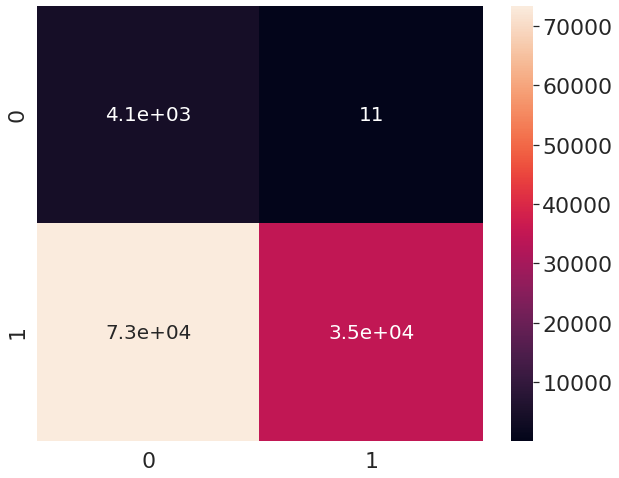

AUC score:  0.6595754722407889


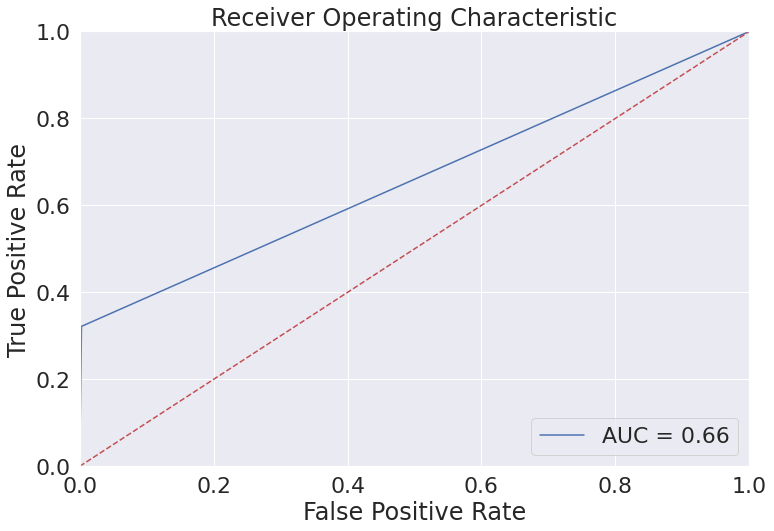

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='tpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 3.32869865e-03  7.79381460e-02  4.54488186e-08 ...  1.41522176e-18
   1.36728386e-34  2.63126798e-17]
 [ 3.32869866e-03  7.79381461e-02  4.57449383e-08 ...  3.60958584e-18
  -3.45930289e-34 -2.72313269e-17]
 [ 6.65707238e-03  4.28659691e-01  1.56212870e-16 ...  1.28096278e-16
  -2.66732426e-33  0.00000000e+00]
 ...
 [ 3.32869851e-03  7.79381306e-02  1.10840735e-08 ...  4.00575989e-18
  -1.30751189e-34  0.00000000e+00]
 [ 3.32869846e-03  4.28659691e-01  0.00000000e+00 ...  1.01244481e-16
   2.68973875e-34  9.38332470e-19]
 [ 3.32869846e-03  7.79381256e-02  9.72585611e-18 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1 * pc[pc_order[0]] + c2 * pc[pc_order[1]]


0.5
Total train time: 140.6693239212036


### Test on first device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.969     0.996     0.982      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.985     0.997     0.991    100791
weighted avg      0.998     0.998     0.998    100791



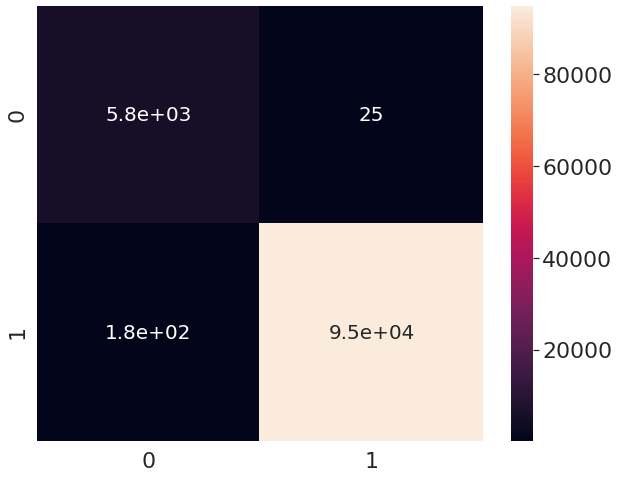

AUC score:  0.9968974153898372


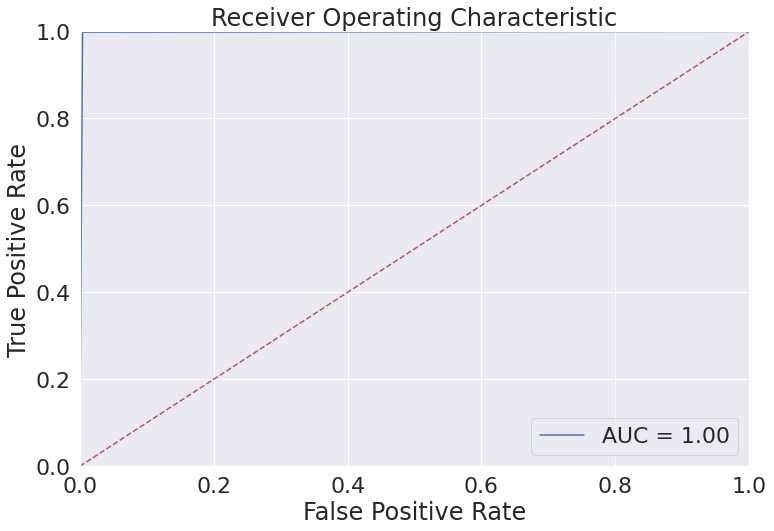

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.996     0.983      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.985     0.997     0.991    100791
weighted avg      0.998     0.998     0.998    100791



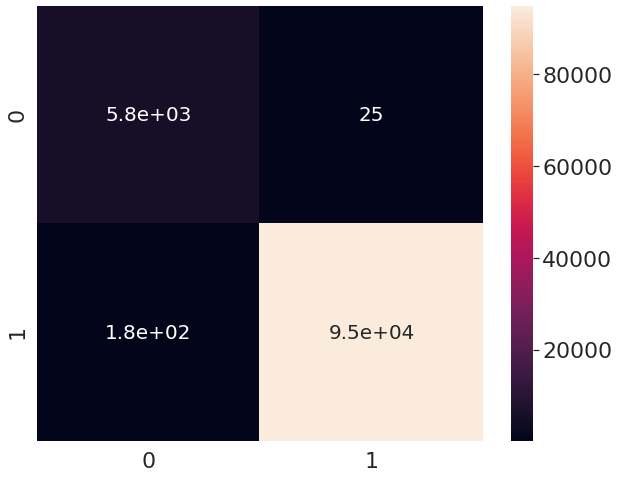

AUC score:  0.9969448177409936


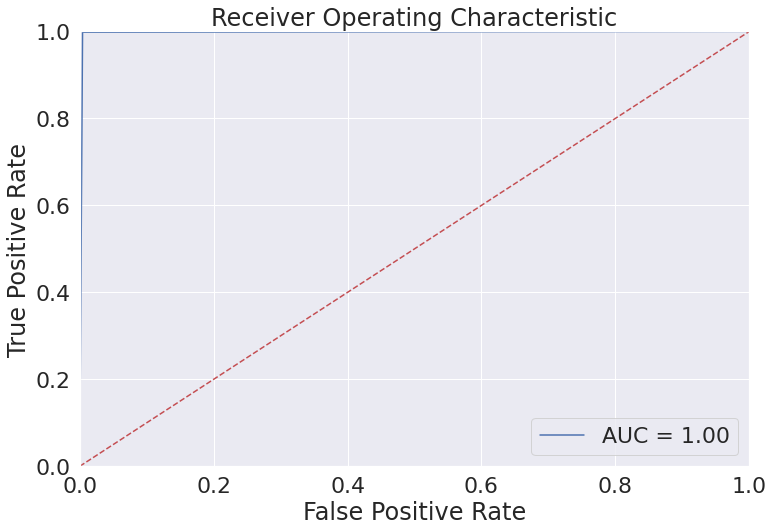

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [37]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.996     0.098      4100
           2      0.999     0.305     0.468    108121

    accuracy                          0.331    112221
   macro avg      0.526     0.651     0.283    112221
weighted avg      0.965     0.331     0.454    112221



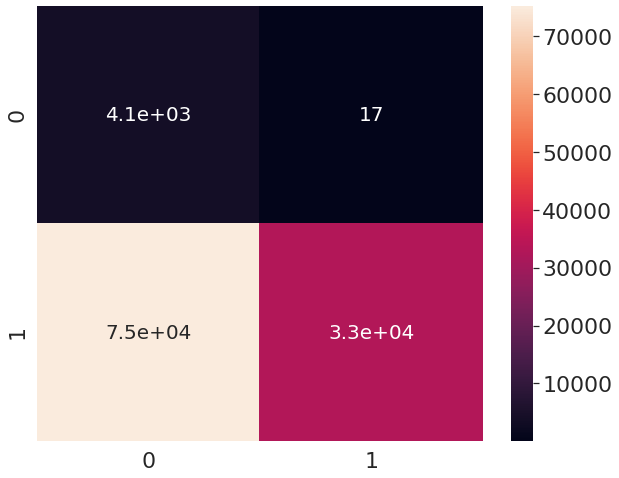

AUC score:  0.6506029976352149


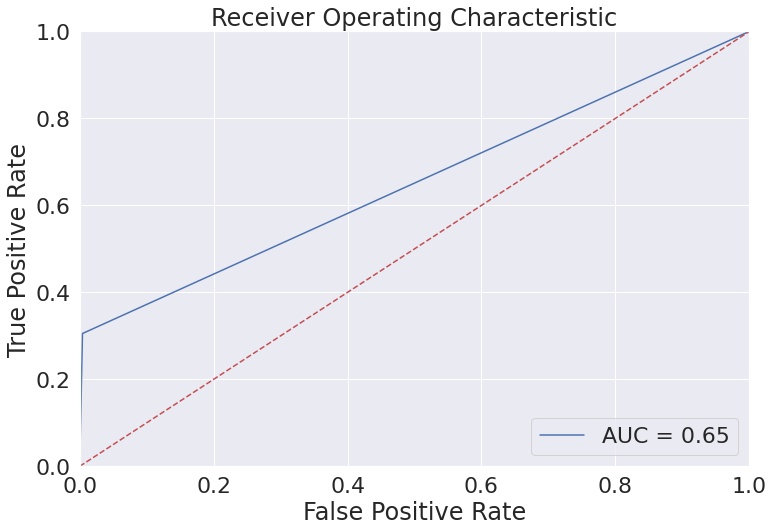

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.052     0.996     0.099      4100
           2      0.999     0.313     0.476    108121

    accuracy                          0.338    112221
   macro avg      0.526     0.654     0.288    112221
weighted avg      0.965     0.338     0.462    112221



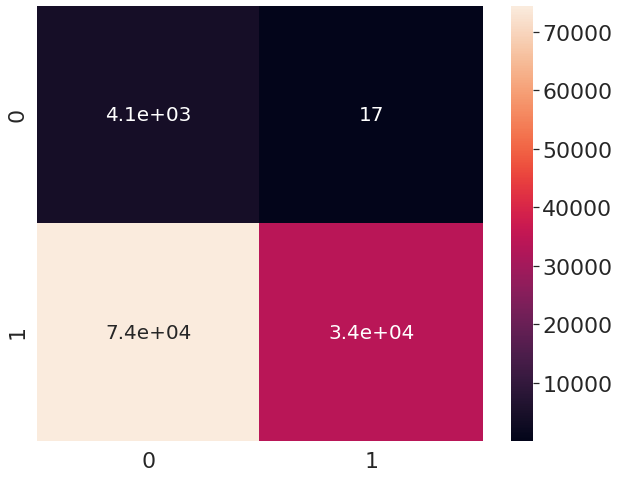

AUC score:  0.6542054430436


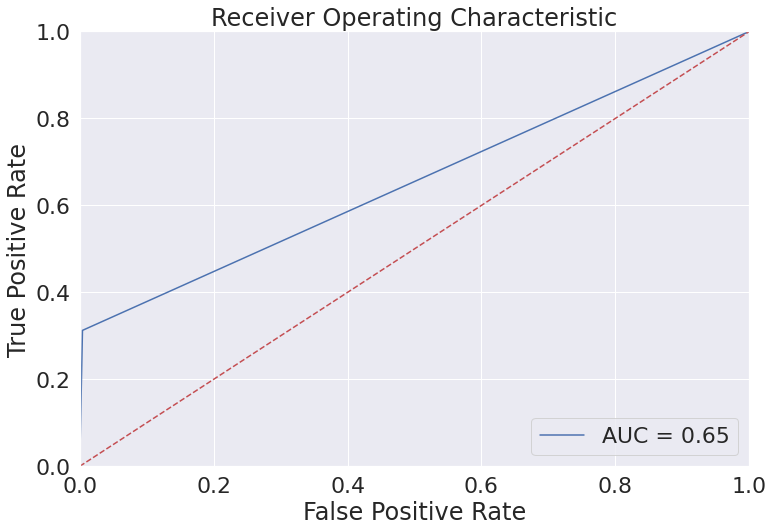

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 3.32869865e-03  7.79381460e-02  4.54488186e-08 ...  1.41522176e-18
   1.36728386e-34  2.63126798e-17]
 [ 3.32869866e-03  7.79381461e-02  4.57449383e-08 ...  3.60958584e-18
  -3.45930289e-34 -2.72313269e-17]
 [ 6.65707238e-03  4.28659691e-01  1.56212870e-16 ...  1.28096278e-16
  -2.66732426e-33  0.00000000e+00]
 ...
 [ 3.32869851e-03  7.79381306e-02  1.10840735e-08 ...  4.00575989e-18
  -1.30751189e-34  0.00000000e+00]
 [ 3.32869846e-03  4.28659691e-01  0.00000000e+00 ...  1.01244481e-16
   2.68973875e-34  9.38332470e-19]
 [ 3.32869846e-03  7.79381256e-02  9.72585611e-18 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.971     0.998     0.984      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.985     0.998     0.992    100791
weighted avg      0.998     0.998     0.998    100791



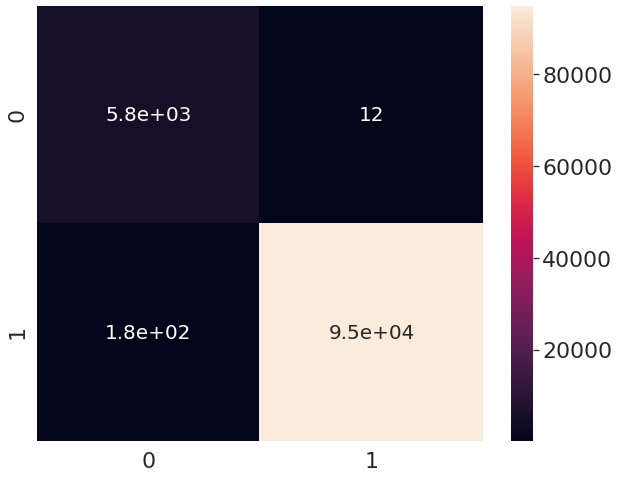

AUC score:  0.9980489551482982


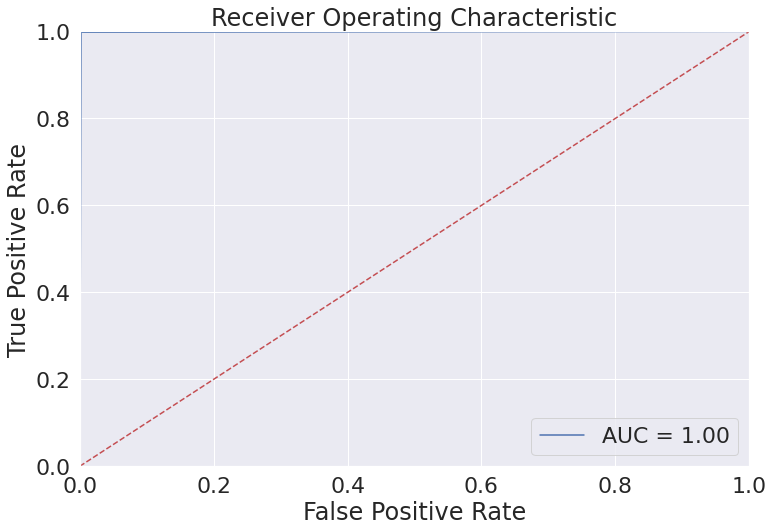

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.973     0.998     0.985      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.986     0.998     0.992    100791
weighted avg      0.998     0.998     0.998    100791



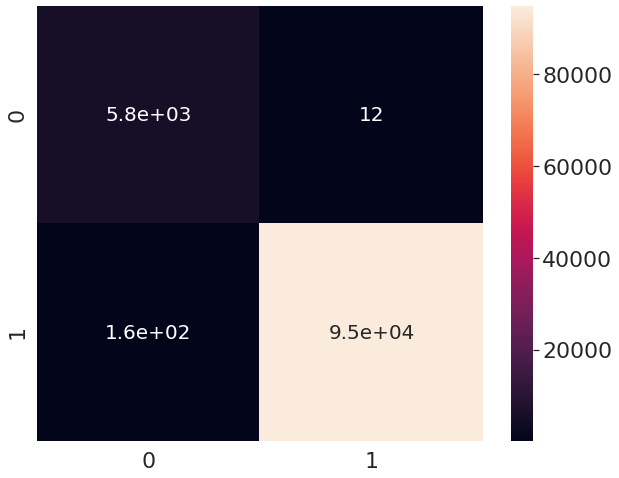

AUC score:  0.9981068913552674


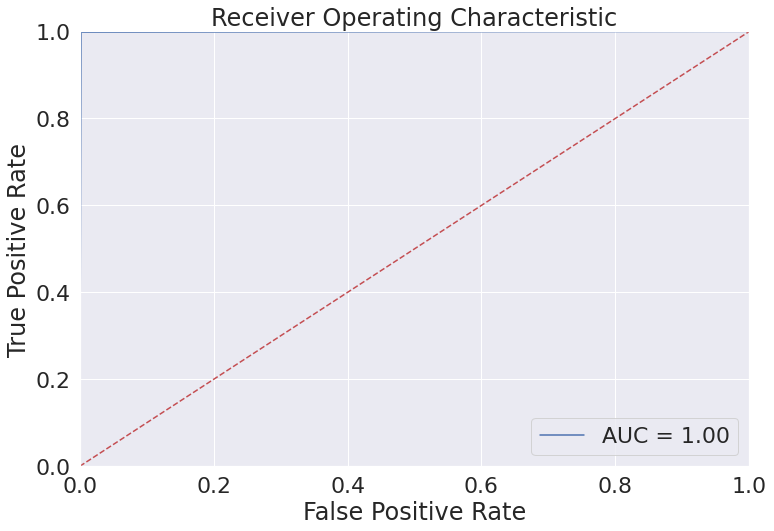

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.049     0.998     0.094      4100
           2      1.000     0.268     0.422    108121

    accuracy                          0.294    112221
   macro avg      0.524     0.633     0.258    112221
weighted avg      0.965     0.294     0.410    112221



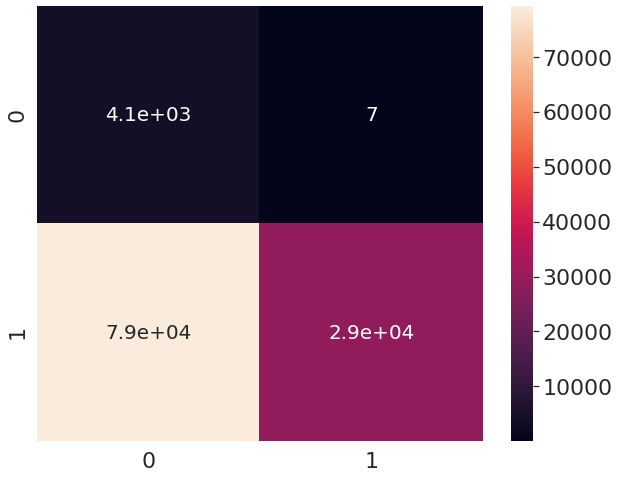

AUC score:  0.6330518732287517


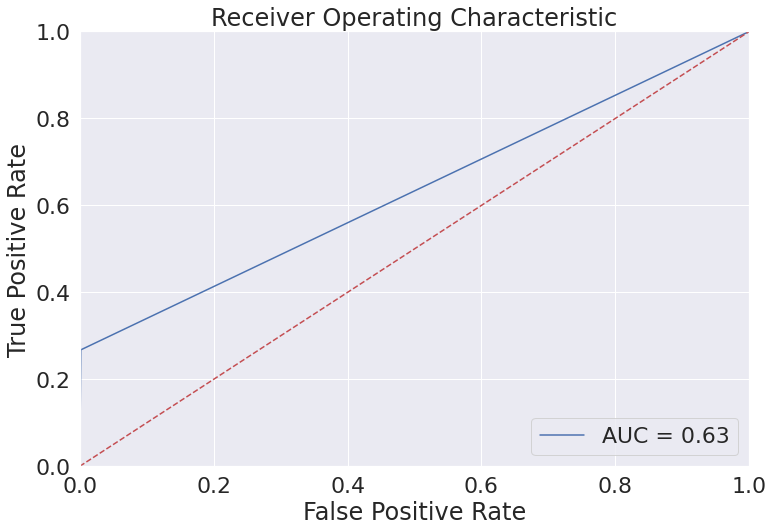

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.049     0.998     0.094      4100
           2      1.000     0.268     0.423    108121

    accuracy                          0.295    112221
   macro avg      0.524     0.633     0.258    112221
weighted avg      0.965     0.295     0.411    112221



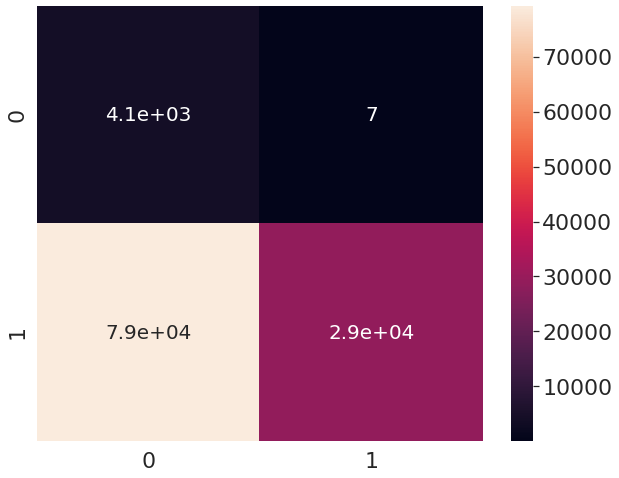

AUC score:  0.6331212399567693


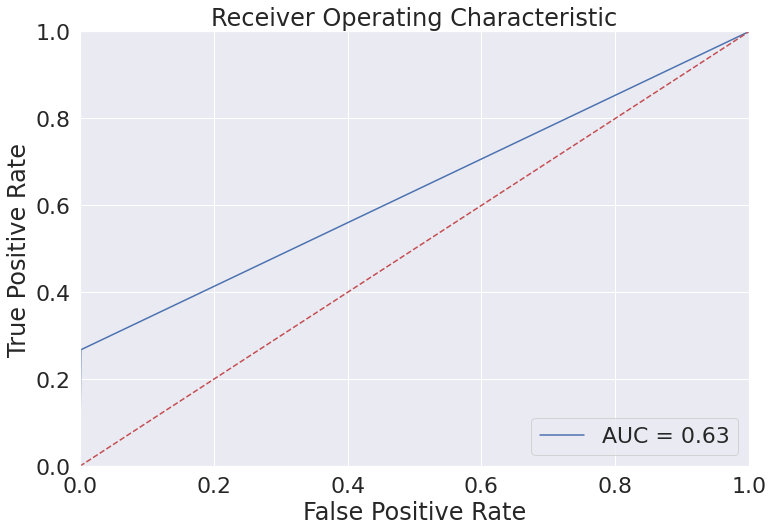

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.4. Anneal

### Train

In [45]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='anneal')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 3.32869865e-03  7.79381460e-02  4.54488186e-08 ...  1.41522176e-18
   1.36728386e-34  2.63126798e-17]
 [ 3.32869866e-03  7.79381461e-02  4.57449383e-08 ...  3.60958584e-18
  -3.45930289e-34 -2.72313269e-17]
 [ 6.65707238e-03  4.28659691e-01  1.56212870e-16 ...  1.28096278e-16
  -2.66732426e-33  0.00000000e+00]
 ...
 [ 3.32869851e-03  7.79381306e-02  1.10840735e-08 ...  4.00575989e-18
  -1.30751189e-34  0.00000000e+00]
 [ 3.32869846e-03  4.28659691e-01  0.00000000e+00 ...  1.01244481e-16
   2.68973875e-34  9.38332470e-19]
 [ 3.32869846e-03  7.79381256e-02  9.72585611e-18 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.996     0.981      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.983     0.997     0.990    100791
weighted avg      0.998     0.998     0.998    100791



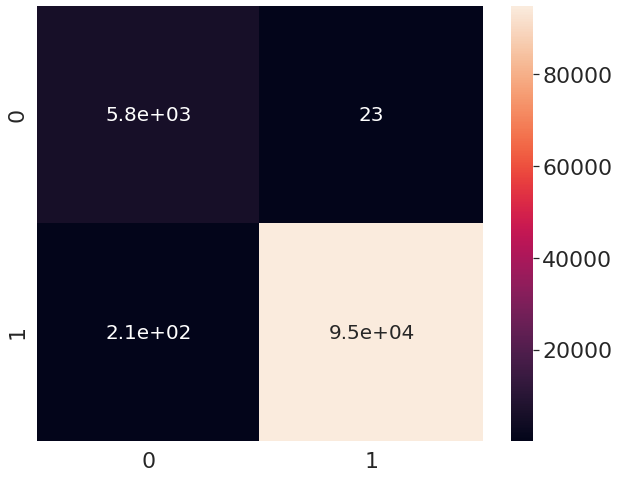

AUC score:  0.9969469536380248


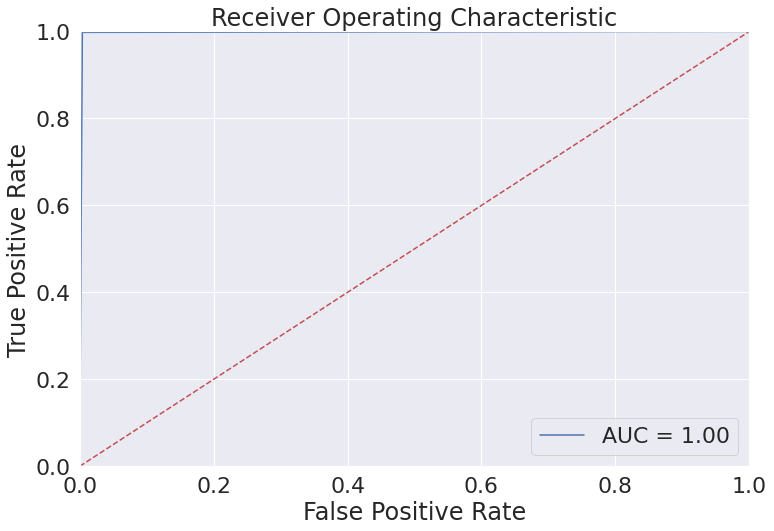

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.968     0.996     0.982      5859
           2      1.000     0.998     0.999     94932

    accuracy                          0.998    100791
   macro avg      0.984     0.997     0.990    100791
weighted avg      0.998     0.998     0.998    100791



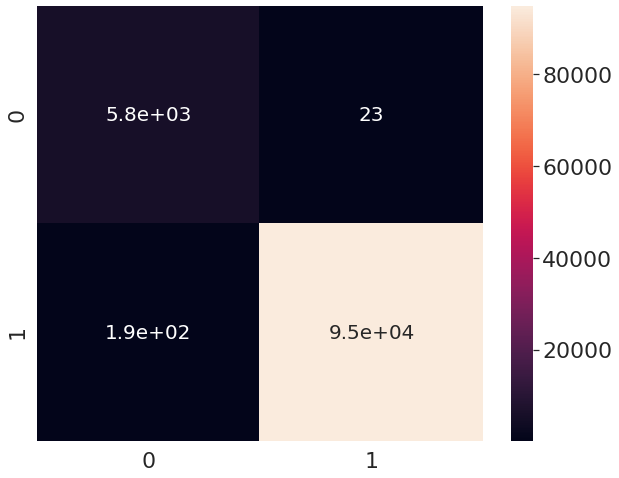

AUC score:  0.9970312244845256


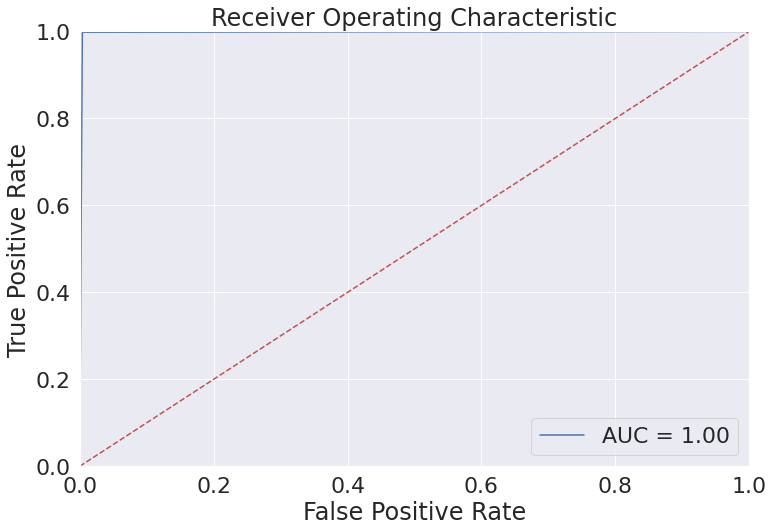

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.053     0.996     0.101      4100
           2      1.000     0.327     0.492    108121

    accuracy                          0.351    112221
   macro avg      0.526     0.661     0.297    112221
weighted avg      0.965     0.351     0.478    112221



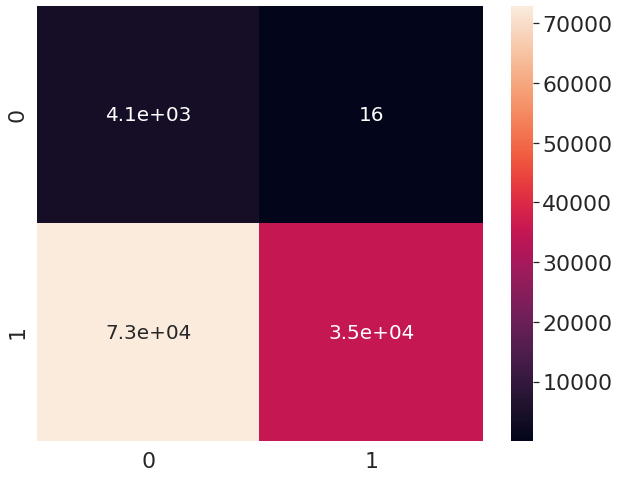

AUC score:  0.6613010626531567


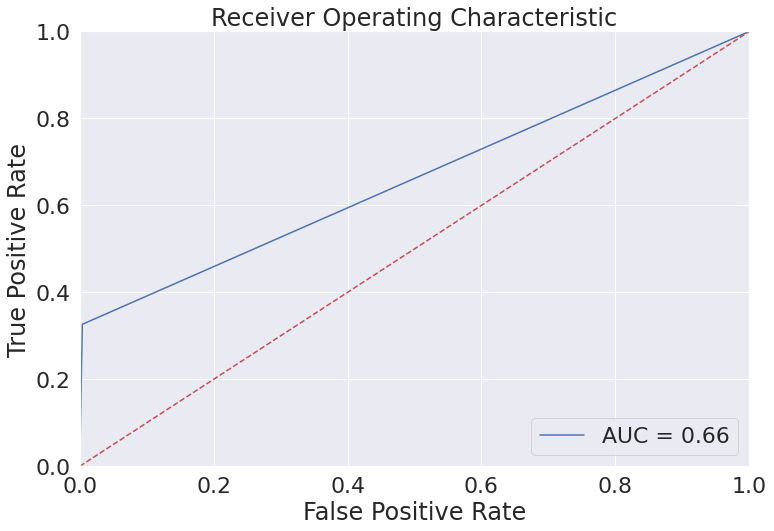

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.054     0.996     0.102      4100
           2      1.000     0.334     0.501    108121

    accuracy                          0.359    112221
   macro avg      0.527     0.665     0.302    112221
weighted avg      0.965     0.359     0.487    112221



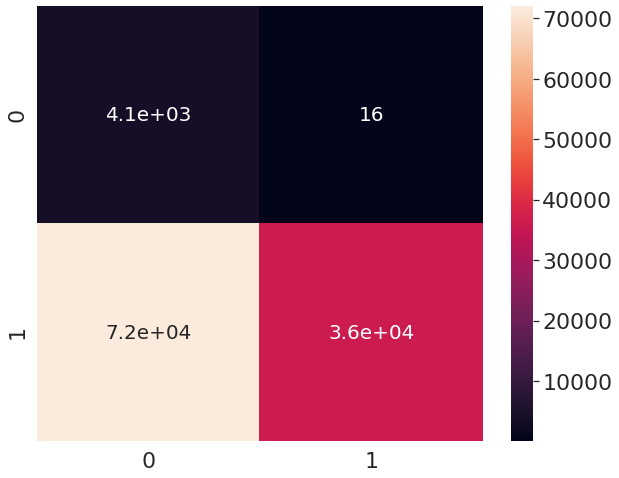

AUC score:  0.6652642150472337


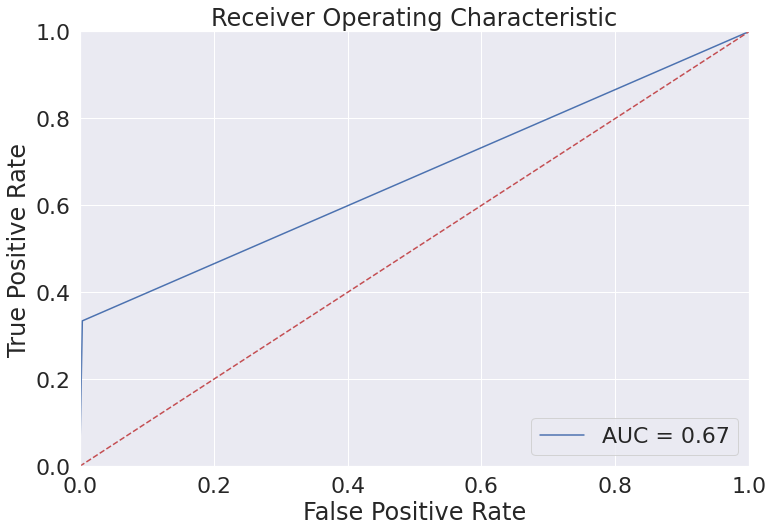

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [50]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='rand')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 2.57355758e-03  8.95522623e-02  5.09993530e-08 ...  1.41522176e-18
   1.46484248e-34  3.08609282e-17]
 [ 2.57355759e-03  8.95522624e-02  5.13316369e-08 ...  3.60958584e-18
  -3.70613152e-34 -3.19383671e-17]
 [ 5.14686395e-03  4.92537313e-01  1.75290702e-16 ...  1.28096278e-16
  -2.85764352e-33  0.00000000e+00]
 ...
 [ 2.57355747e-03  8.95522445e-02  1.24377398e-08 ...  4.00575989e-18
  -1.40080565e-34  0.00000000e+00]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  1.01244481e-16
   2.88165734e-34  1.10052687e-18]
 [ 2.57355743e-03  8.95522388e-02  1.09136471e-17 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.927     0.995     0.960      5859
           2      1.000     0.995     0.997     94932

    accuracy                          0.995    100791
   macro avg      0.963     0.995     0.979    100791
weighted avg      0.995     0.995     0.995    100791



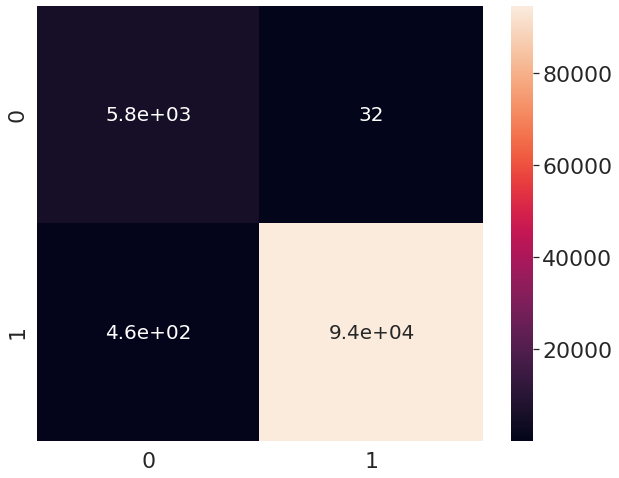

AUC score:  0.9948621725063062


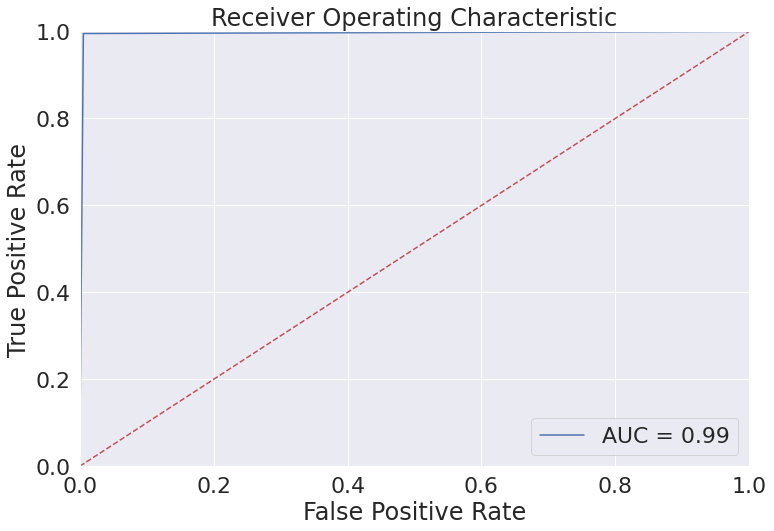

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.928     0.995     0.960      5859
           2      1.000     0.995     0.997     94932

    accuracy                          0.995    100791
   macro avg      0.964     0.995     0.979    100791
weighted avg      0.995     0.995     0.995    100791



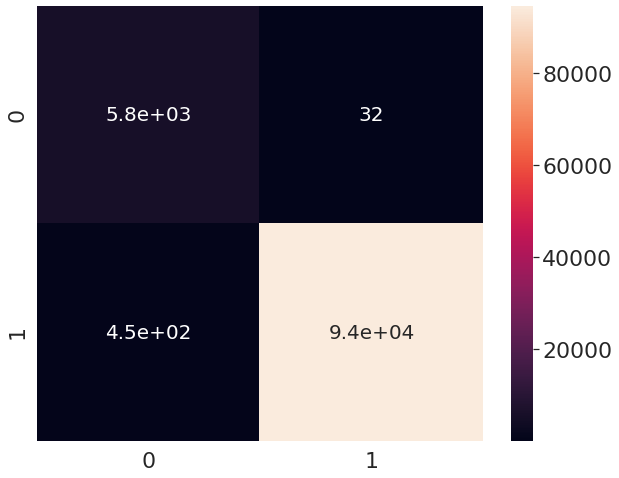

AUC score:  0.9948832402179313


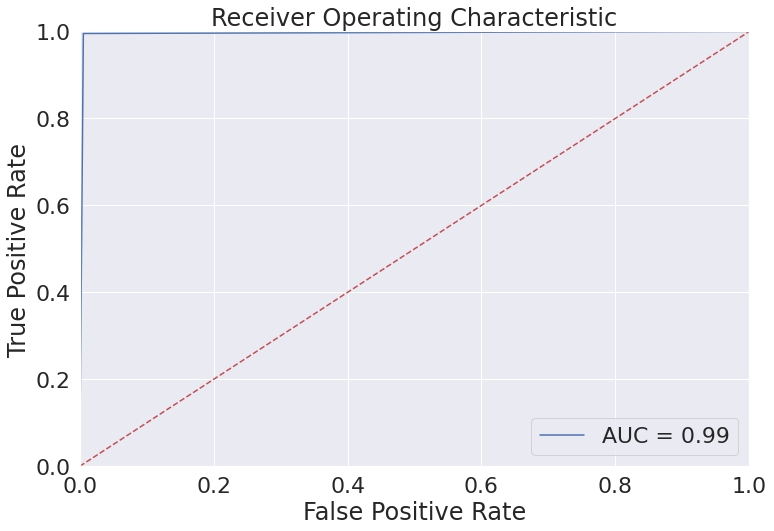

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.936     0.994     0.964      4100
           2      1.000     0.997     0.999    108121

    accuracy                          0.997    112221
   macro avg      0.968     0.996     0.981    112221
weighted avg      0.997     0.997     0.997    112221



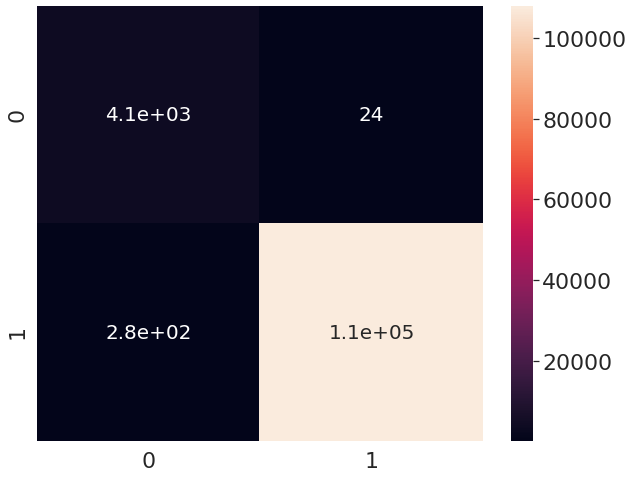

AUC score:  0.9957875740391129


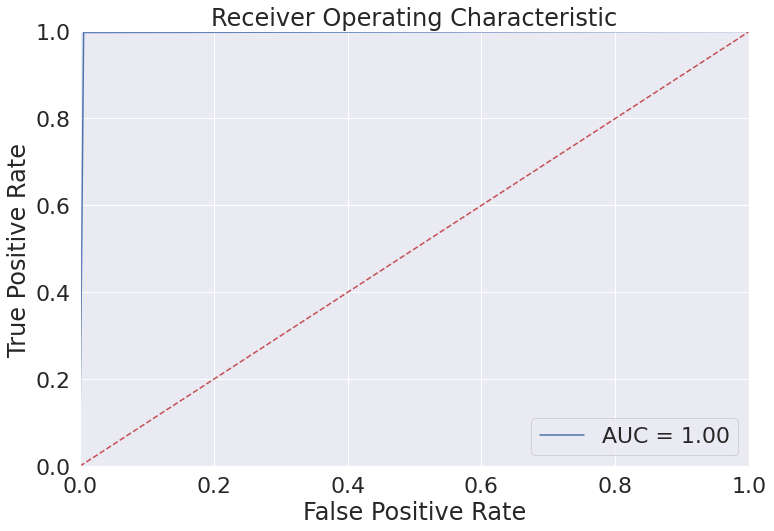

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [53]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.936     0.994     0.964      4100
           2      1.000     0.997     0.999    108121

    accuracy                          0.997    112221
   macro avg      0.968     0.996     0.981    112221
weighted avg      0.997     0.997     0.997    112221



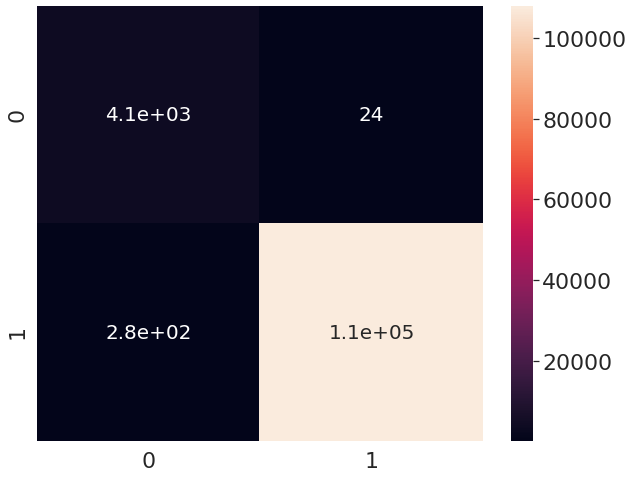

AUC score:  0.9957875740391129


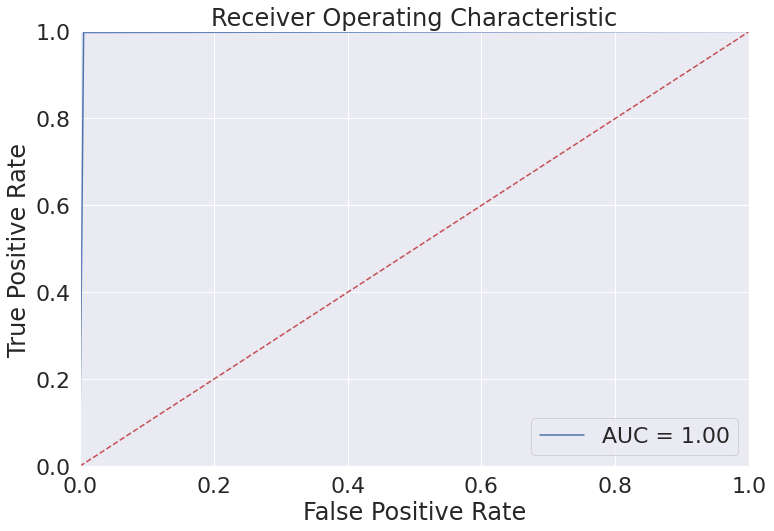

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [55]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='tpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 2.57355758e-03  8.95522623e-02  5.09993530e-08 ...  1.41522176e-18
   1.46484248e-34  3.08609282e-17]
 [ 2.57355759e-03  8.95522624e-02  5.13316369e-08 ...  3.60958584e-18
  -3.70613152e-34 -3.19383671e-17]
 [ 5.14686395e-03  4.92537313e-01  1.75290702e-16 ...  1.28096278e-16
  -2.85764352e-33  0.00000000e+00]
 ...
 [ 2.57355747e-03  8.95522445e-02  1.24377398e-08 ...  4.00575989e-18
  -1.40080565e-34  0.00000000e+00]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  1.01244481e-16
   2.88165734e-34  1.10052687e-18]
 [ 2.57355743e-03  8.95522388e-02  1.09136471e-17 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.508     0.990     0.672      5859
           2      0.999     0.941     0.969     94932

    accuracy                          0.944    100791
   macro avg      0.754     0.965     0.820    100791
weighted avg      0.971     0.944     0.952    100791



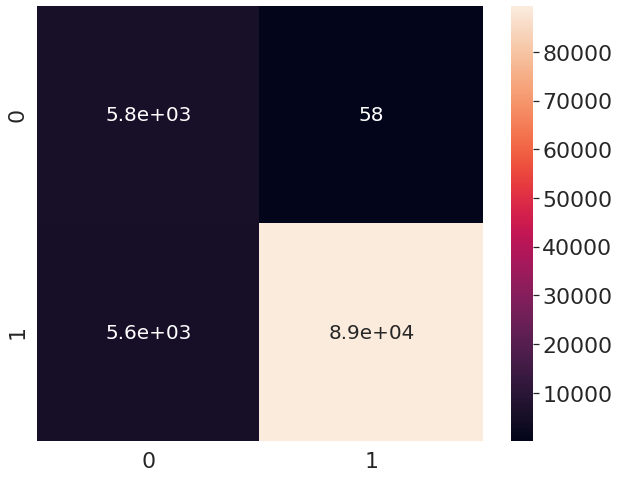

AUC score:  0.9654870835510492


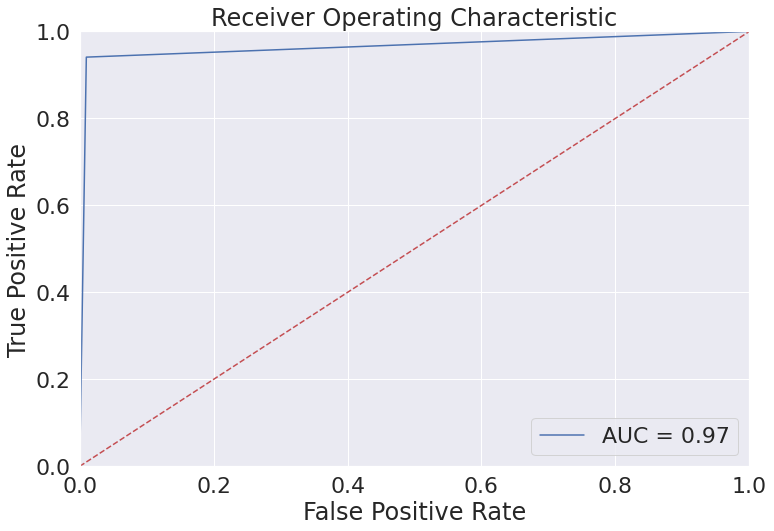

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [56]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.509     0.990     0.672      5859
           2      0.999     0.941     0.969     94932

    accuracy                          0.944    100791
   macro avg      0.754     0.965     0.821    100791
weighted avg      0.971     0.944     0.952    100791



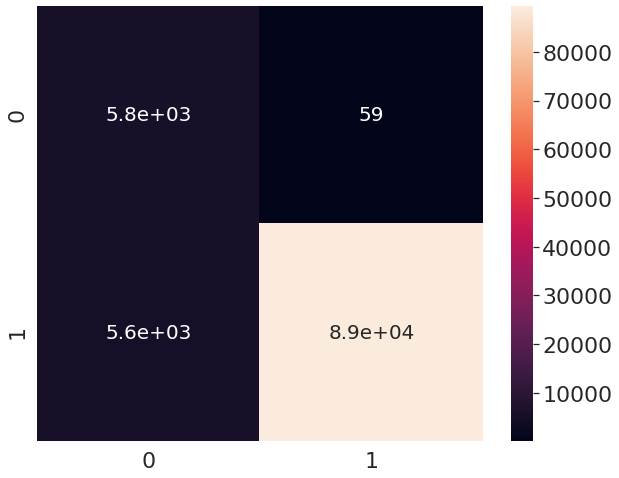

AUC score:  0.9654438801792833


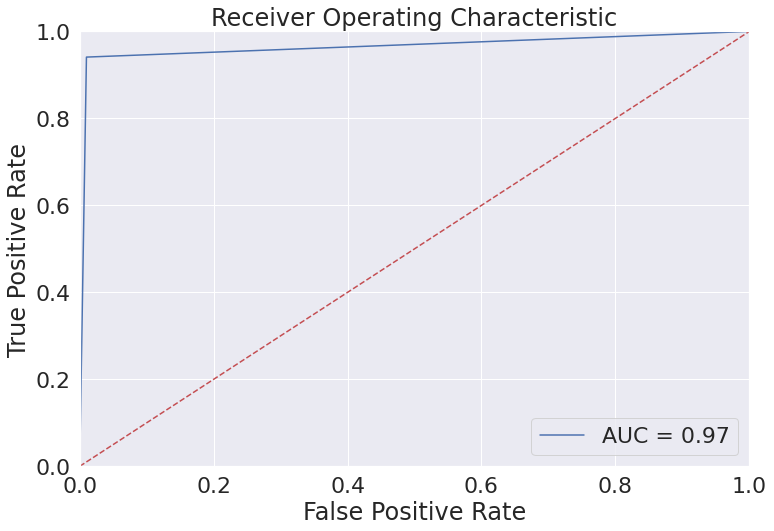

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.966     0.990     0.978      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.983     0.994     0.989    112221
weighted avg      0.998     0.998     0.998    112221



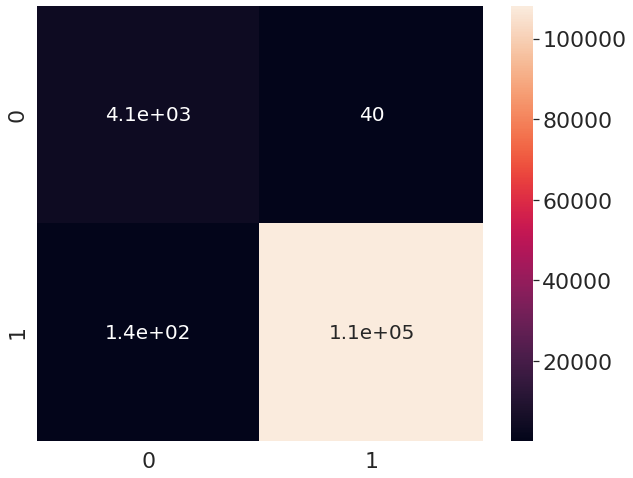

AUC score:  0.9944652795276114


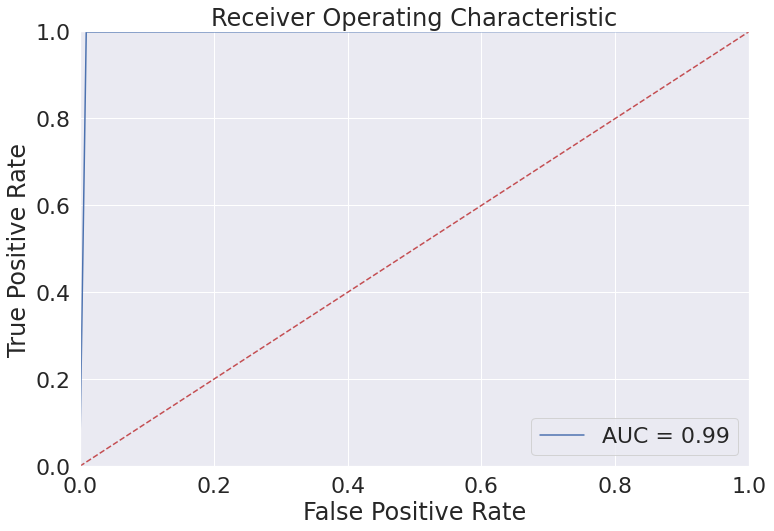

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.972     0.990     0.981      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.999    112221
   macro avg      0.986     0.995     0.990    112221
weighted avg      0.999     0.999     0.999    112221



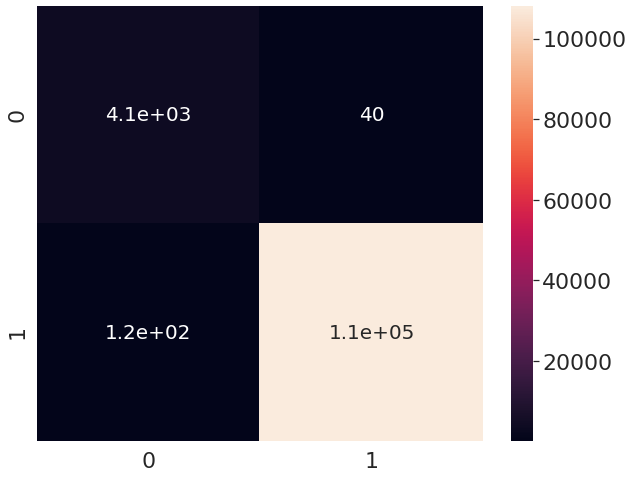

AUC score:  0.9945808907409743


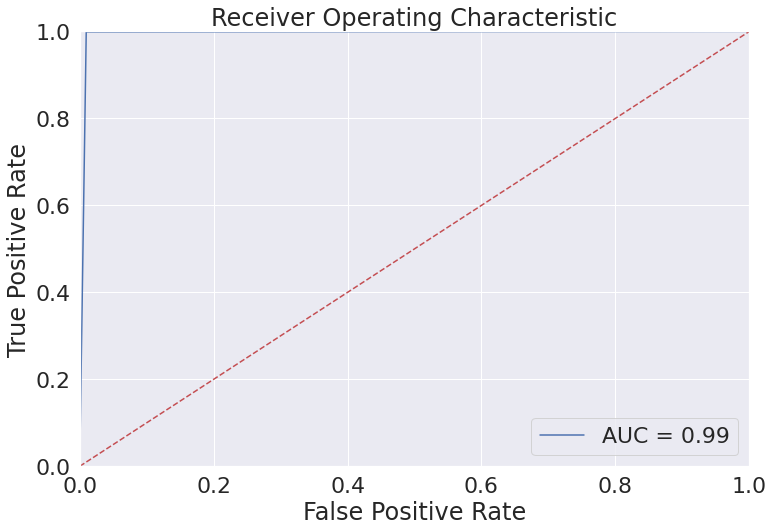

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [59]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [60]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 2.57355758e-03  8.95522623e-02  5.09993530e-08 ...  1.41522176e-18
   1.46484248e-34  3.08609282e-17]
 [ 2.57355759e-03  8.95522624e-02  5.13316369e-08 ...  3.60958584e-18
  -3.70613152e-34 -3.19383671e-17]
 [ 5.14686395e-03  4.92537313e-01  1.75290702e-16 ...  1.28096278e-16
  -2.85764352e-33  0.00000000e+00]
 ...
 [ 2.57355747e-03  8.95522445e-02  1.24377398e-08 ...  4.00575989e-18
  -1.40080565e-34  0.00000000e+00]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  1.01244481e-16
   2.88165734e-34  1.10052687e-18]
 [ 2.57355743e-03  8.95522388e-02  1.09136471e-17 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.502     0.993     0.667      5859
           2      1.000     0.939     0.968     94932

    accuracy                          0.942    100791
   macro avg      0.751     0.966     0.818    100791
weighted avg      0.971     0.942     0.951    100791



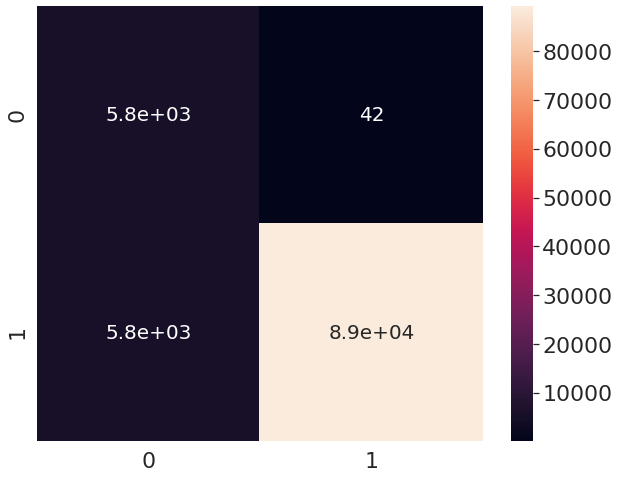

AUC score:  0.9659992619504896


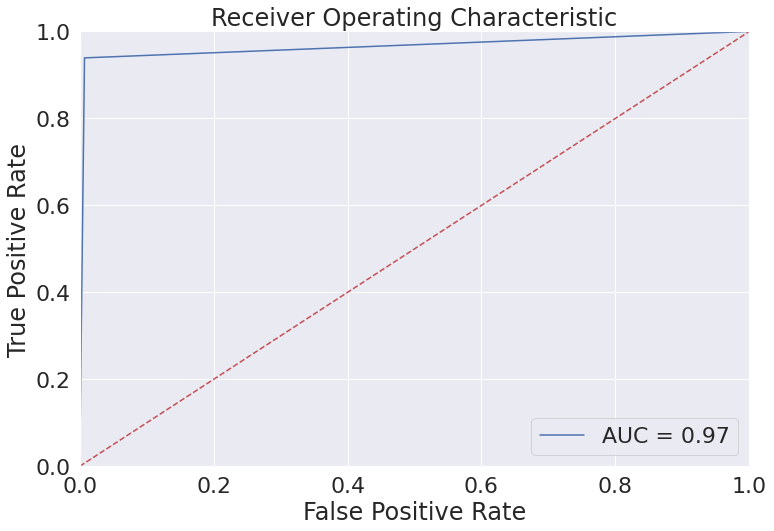

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.508     0.993     0.672      5859
           2      1.000     0.941     0.969     94932

    accuracy                          0.944    100791
   macro avg      0.754     0.967     0.821    100791
weighted avg      0.971     0.944     0.952    100791



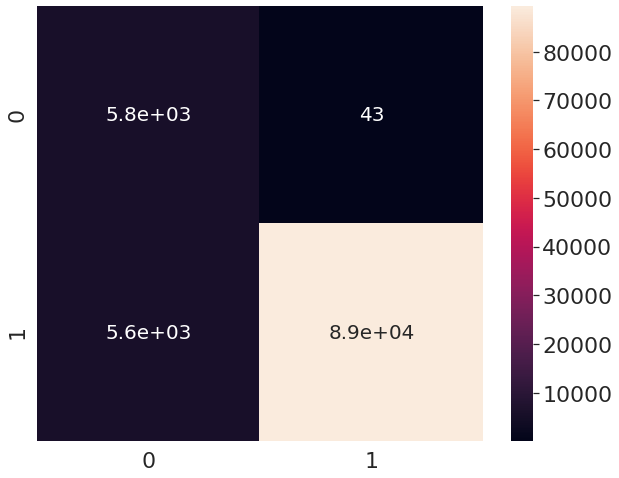

AUC score:  0.9666934284856044


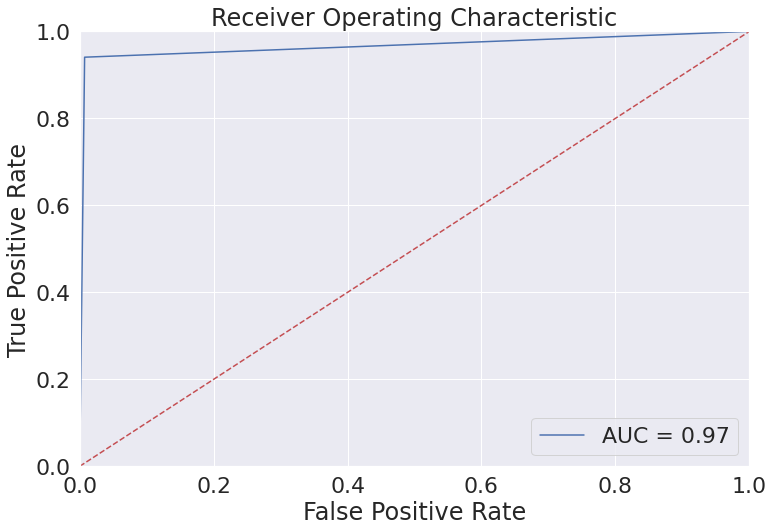

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [62]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.967     0.993     0.980      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.999    112221
   macro avg      0.984     0.996     0.990    112221
weighted avg      0.999     0.999     0.999    112221



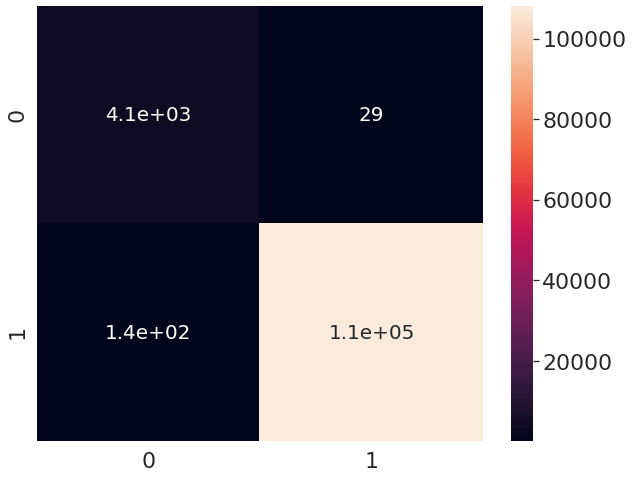

AUC score:  0.9958298651849181


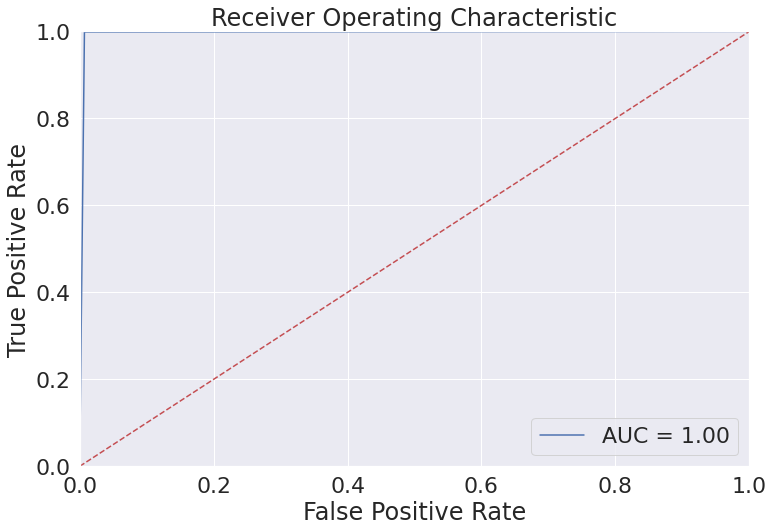

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.976     0.993     0.984      4100
           2      1.000     0.999     0.999    108121

    accuracy                          0.999    112221
   macro avg      0.988     0.996     0.992    112221
weighted avg      0.999     0.999     0.999    112221



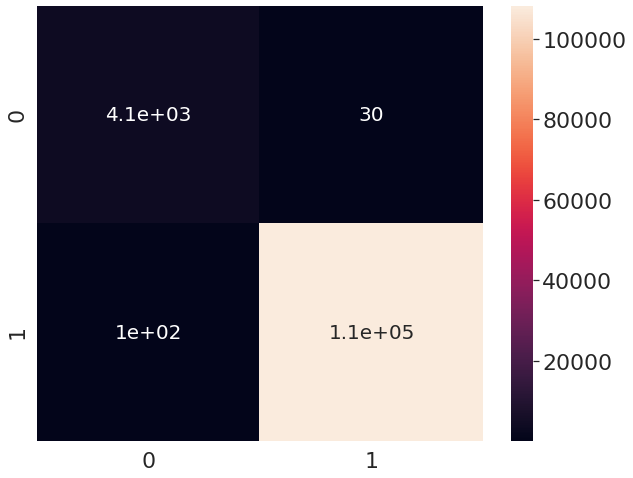

AUC score:  0.995879018561183


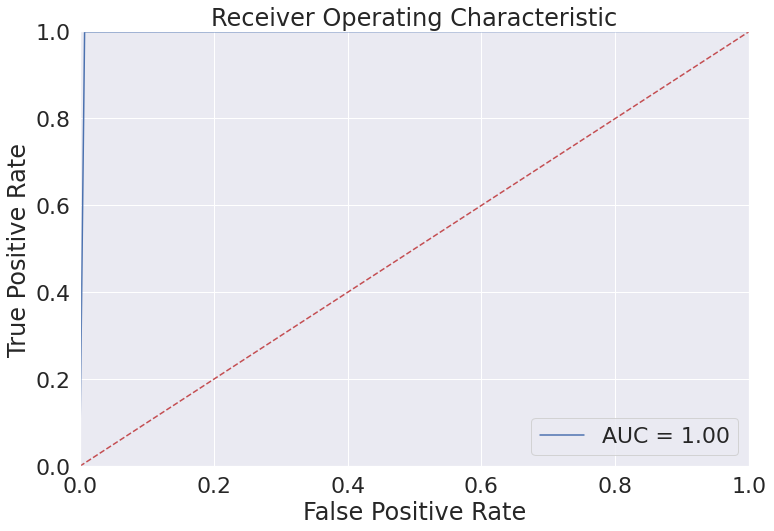

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.4. ANNEAL

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='anneal')

--------------Training and testing in the same device----------------
(27338, 115) (27338,)
------------Scale data-----------------
(27338, 115) (27338,)
X_train_scaled
[[ 2.57355758e-03  8.95522623e-02  5.09993530e-08 ...  1.41522176e-18
   1.46484248e-34  3.08609282e-17]
 [ 2.57355759e-03  8.95522624e-02  5.13316369e-08 ...  3.60958584e-18
  -3.70613152e-34 -3.19383671e-17]
 [ 5.14686395e-03  4.92537313e-01  1.75290702e-16 ...  1.28096278e-16
  -2.85764352e-33  0.00000000e+00]
 ...
 [ 2.57355747e-03  8.95522445e-02  1.24377398e-08 ...  4.00575989e-18
  -1.40080565e-34  0.00000000e+00]
 [ 2.57355743e-03  4.92537313e-01  0.00000000e+00 ...  1.01244481e-16
   2.88165734e-34  1.10052687e-18]
 [ 2.57355743e-03  8.95522388e-02  1.09136471e-17 ...  2.00067898e-18
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(27338, 115) (27338,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.504     0.996     0.669      5859
           2      1.000     0.939     0.969     94932

    accuracy                          0.943    100791
   macro avg      0.752     0.968     0.819    100791
weighted avg      0.971     0.943     0.951    100791



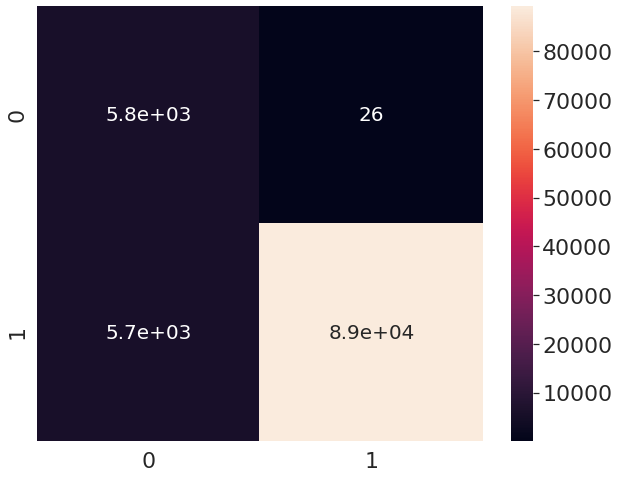

AUC score:  0.9675279574358441


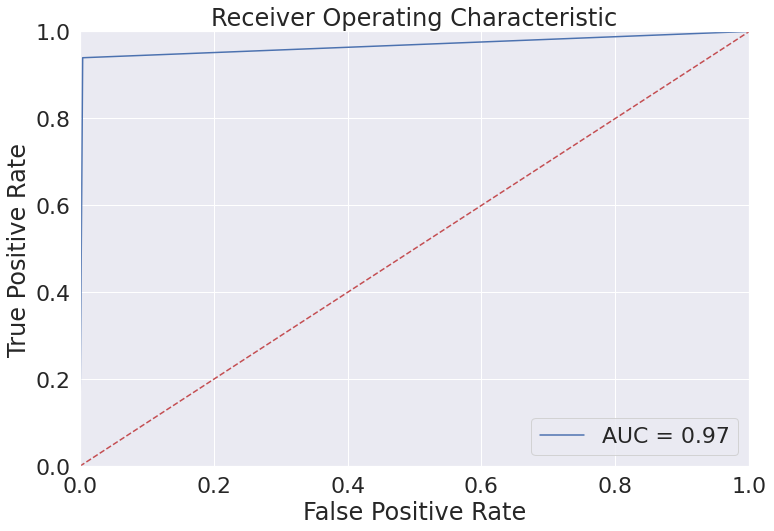

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

Shape:  (100791, 115) (100791,)
----------------------Test is starting----------------------
Scale data
Shape:  (100791, 115) (100791,)
Normalize data
Shape:  (100791, 115) (100791,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.505     0.996     0.670      5859
           2      1.000     0.940     0.969     94932

    accuracy                          0.943    100791
   macro avg      0.752     0.968     0.819    100791
weighted avg      0.971     0.943     0.951    100791



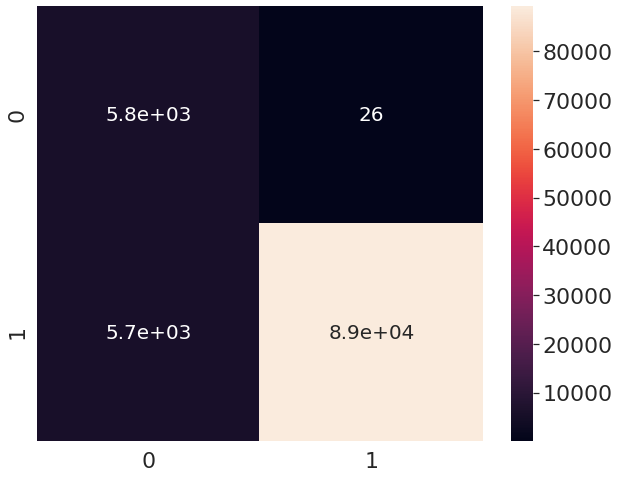

AUC score:  0.9676332959939697


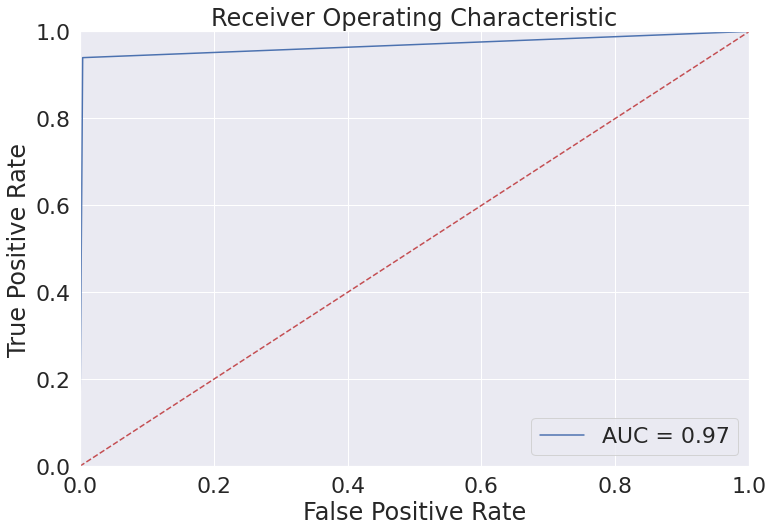

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.950     0.996     0.973      4100
           2      1.000     0.998     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.975     0.997     0.986    112221
weighted avg      0.998     0.998     0.998    112221



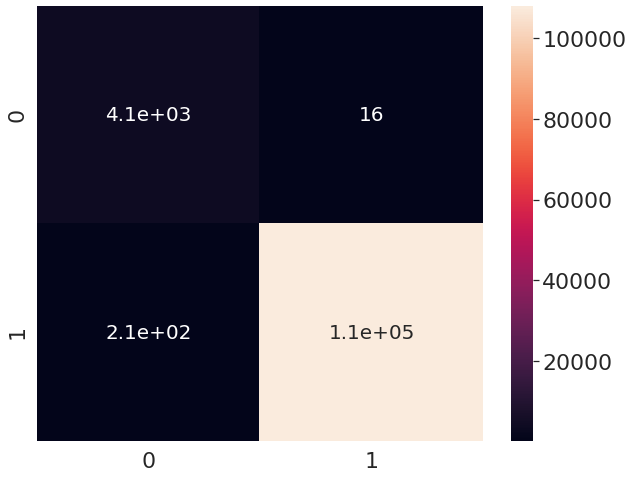

AUC score:  0.9970637729499537


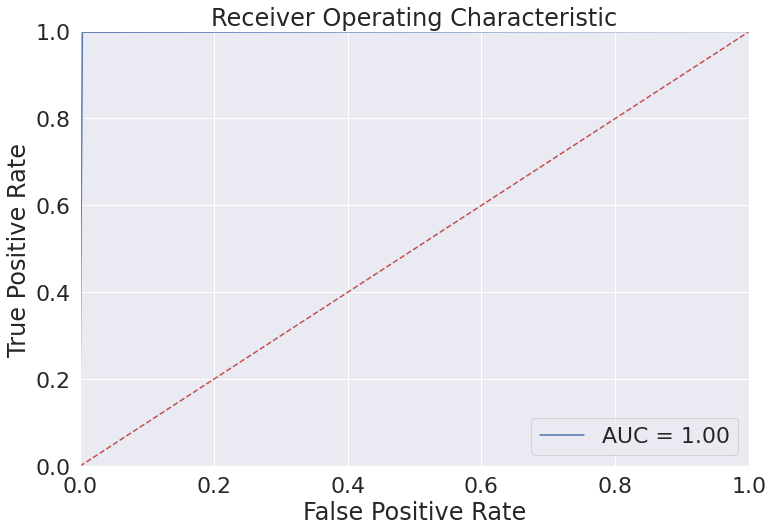

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

Shape:  (112221, 115) (112221,)
----------------------Test is starting----------------------
Scale data
Shape:  (112221, 115) (112221,)
Normalize data
Shape:  (112221, 115) (112221,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.953     0.996     0.974      4100
           2      1.000     0.998     0.999    108121

    accuracy                          0.998    112221
   macro avg      0.976     0.997     0.987    112221
weighted avg      0.998     0.998     0.998    112221



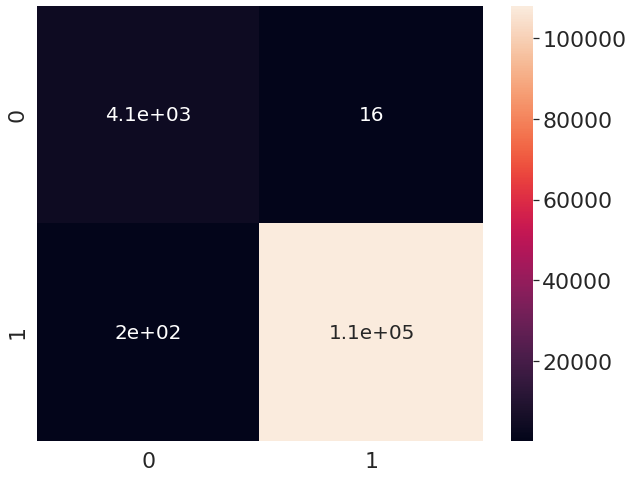

AUC score:  0.9971192663323679


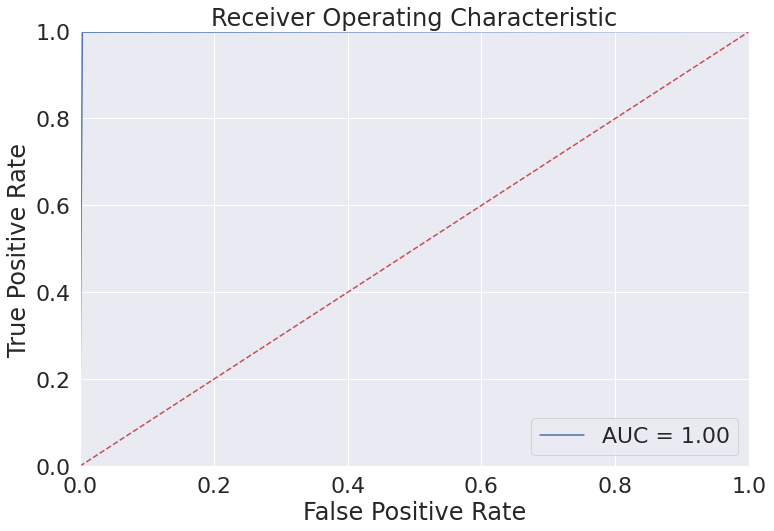

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)